In [3]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
resNuevos = pd.read_csv('/content/resultados_experimentos_modelo_nuevo_30clientes.csv')
resViejos = pd.read_csv('/content/resultados_experimentos_modelo_viejo_30clientes.csv')
resNuevosSinExtra = pd.read_csv('/content/resultados_experimentos_modelo_nuevo_sin_extra_30clientes.csv')

In [5]:
tabla = pd.merge(resNuevos, resViejos, on = 'archivo')

In [6]:
tabla = pd.merge(tabla, resNuevosSinExtra, on='archivo')

In [7]:
tabla.head()

,archivo,status_x,valor_objetivo_x,tiempo_segundos_x,status_y,valor_objetivo_y,tiempo_segundos_y,status,valor_objetivo,tiempo_segundos
0,instancia_0_30_clientes.txt,"integer optimal, tolerance",32956.0,516.492066,"integer optimal, tolerance",46735.0,0.570691,"integer optimal, tolerance",24162.0,9.977224
1,instancia_1_30_clientes.txt,integer optimal solution,45083.0,15.775854,"integer optimal, tolerance",45083.0,0.405091,"integer optimal, tolerance",30881.0,40.948394
2,instancia_2_30_clientes.txt,"integer optimal, tolerance",44213.0,14.289668,"integer optimal, tolerance",44213.0,0.557126,"integer optimal, tolerance",24833.0,619.208348
3,instancia_3_30_clientes.txt,"integer optimal, tolerance",46775.0,38.410404,"integer optimal, tolerance",49476.0,0.494112,integer optimal solution,24448.0,3.337651
4,instancia_4_30_clientes.txt,"integer optimal, tolerance",41920.0,104.886214,"integer optimal, tolerance",43849.0,1.587583,"integer optimal, tolerance",24014.0,84.967986


In [8]:
print("Tiempo promedio en resolver una instancia: ")
print(f"Modelo viejo: {tabla.tiempo_segundos_y.mean():.2f}s")
print(f"Modelo nuevo: {tabla.tiempo_segundos.mean():.2f}s (subestima)")
print(f"Modelo nuevo con restricciones extra: {tabla.tiempo_segundos_x.mean():.2f}s")

Tiempo promedio en resolver una instancia: 
Modelo viejo: 38.98s
Modelo nuevo: 485.41s (subestima)
Modelo nuevo con restricciones extra: 43.35s


In [9]:
print(f"En promedio el modelo nuevo tarda {(485.41/38.98 -1)*100:.2f}% mas en resolver una instancia de 30 clientes que el modelo viejo")
print(f"En promedio el modelo nuevo con restricciones extra tarda {(43.35/38.98 -1)*100:.2f}% mas en resolver una instancia de 30 clientes que el modelo viejo")

En promedio el modelo nuevo tarda 1145.28% mas en resolver una instancia de 30 clientes que el modelo viejo
En promedio el modelo nuevo con restricciones extra tarda 11.21% mas en resolver una instancia de 30 clientes que el modelo viejo


In [10]:
objN = tabla.valor_objetivo.fillna(35070).mean()
objE = tabla.valor_objetivo_x.mean()
objV = tabla.valor_objetivo_y.mean()
print(f"promedio valor objetivo -> modelo viejo: {objV}, modelo restricciones extra: {objE}, modelo nuevo: {objN}")

print(f"El modelo nuevo con restricciones extra reduce el costo promedio en {100 -(objE*100)/objV:.2f} %")
print(f"El modelo nuevo reduce el costo promedio en {100 -(objN*100)/objV:.2f} %")

promedio valor objetivo -> modelo viejo: 45601.63333333333, modelo restricciones extra: 40200.833333333336, modelo nuevo: 29413.233333333334
El modelo nuevo con restricciones extra reduce el costo promedio en 11.84 %
El modelo nuevo reduce el costo promedio en 35.50 %


#Graficos

In [11]:

# Agregar columna 'modelo'
resNuevos['modelo'] = 'nuevo'
resViejos['modelo'] = 'viejo'
resNuevosSinExtra['modelo'] = 'nuevo_sin_extra'

# Unir todos en un único DataFrame
df = pd.concat([resNuevos, resViejos, resNuevosSinExtra], ignore_index=True)

# Extraer cantidad de clientes si está en el nombre del archivo
df["cant_clientes"] = df["archivo"].str.extract(r'(\d+)_clientes').astype(float)

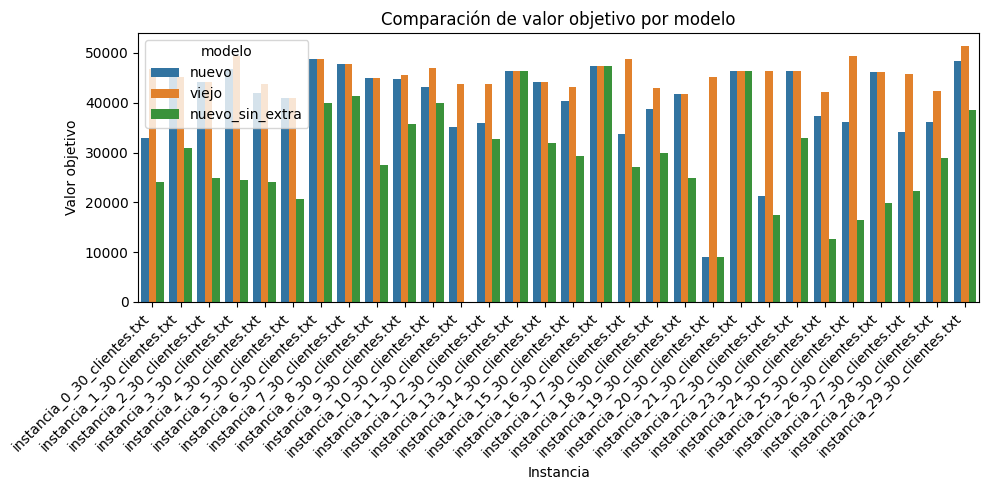

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="archivo", y="valor_objetivo", hue="modelo")
plt.title("Comparación de valor objetivo por modelo")
plt.xlabel("Instancia")
plt.ylabel("Valor objetivo")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Podemos observar como los modelos nuevos efectivamente casi siempre reducen los costos significativamente

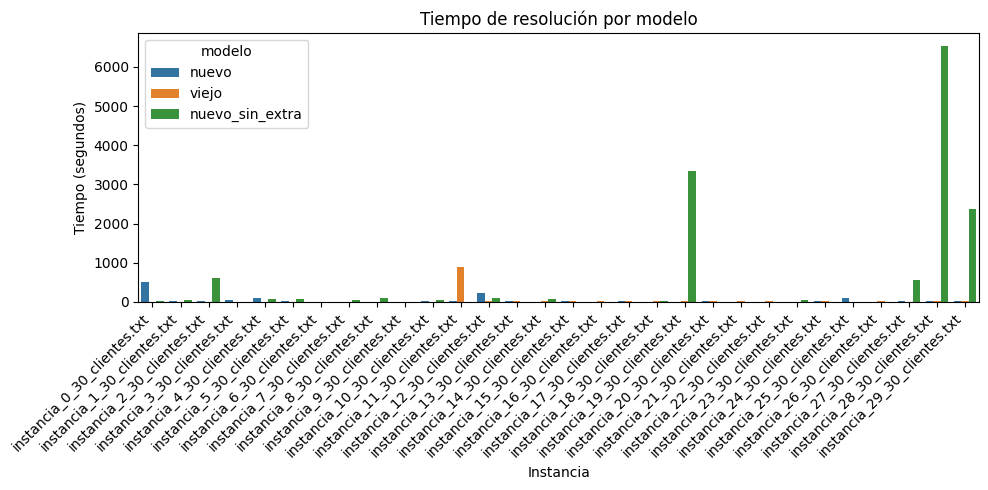

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="archivo", y="tiempo_segundos", hue="modelo")
plt.title("Tiempo de resolución por modelo")
plt.xlabel("Instancia")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Hay algunas instancias particulares que el modelo nuevo sin restricciones extra tarda exageradamente más que el modelo viejo

In [14]:
def filtrar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_superior = Q3 + 1.5 * IQR
    umbral_inferior = Q1 - 1.5 * IQR
    df_filtrado = df[(df[columna] >= umbral_inferior) & (df[columna] <= umbral_superior)]
    return df_filtrado, (umbral_inferior, umbral_superior)

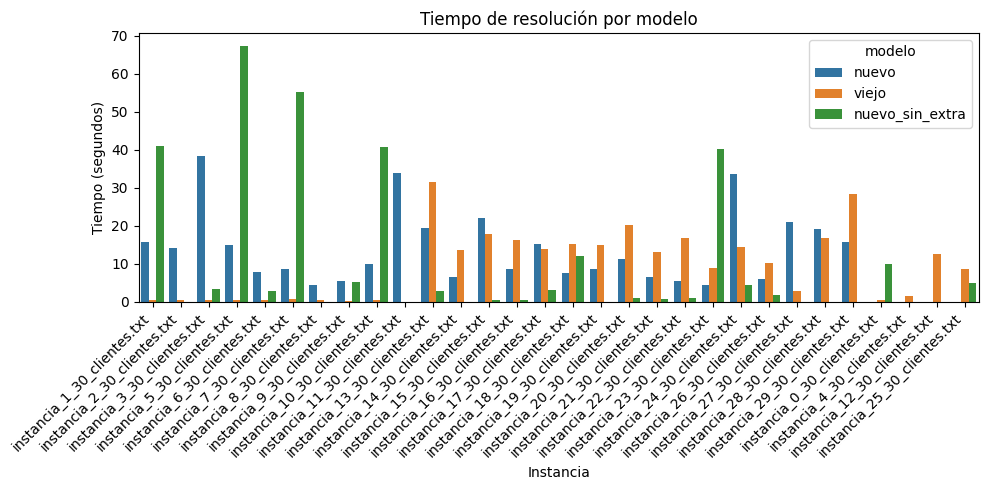

In [15]:
df_filtrado, (a,b) = filtrar_outliers_iqr(df, "tiempo_segundos")

plt.figure(figsize=(10,5))
sns.barplot(data=df_filtrado, x="archivo", y="tiempo_segundos", hue="modelo")
plt.title("Tiempo de resolución por modelo")
plt.xlabel("Instancia")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()